In [1]:
#Setting working path required for relative package loading

import os
os.chdir("/home/tales/ds/walmart-recruiting-store-sales-forecasting/")
print("working dir:", "\'" + os.getcwd() + "\'")

working dir: '/home/tales/ds/walmart-recruiting-store-sales-forecasting'


In [2]:
import pandas as pd

from src.data import dao
from src.processment import process
from src.ml import evaluation
from src.utils import pretties, time_utils, stats
from src.visualization import plot
from bokeh.plotting import show, output_notebook

In [3]:
pretties.max_data_frame_columns()
pretties.decimal_notation()
output_notebook()

Loading BokehJS ...

# <font color="darkred">EVALUATION</font>

# walmart-recruiting-store-sales-forecasting
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

<div class="markdown-converter__text--rendered"><p>This competition is evaluated on the weighted mean absolute error (WMAE):</p>
<p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-1-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mtext>WMAE</mtext></mrow><mo>=</mo><mfrac><mn>1</mn><mrow><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>w</mi><mi>i</mi></msub></mrow></mrow></mfrac><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>n</mi></munderover><msub><mi>w</mi><mi>i</mi></msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><msub><mi>y</mi><mi>i</mi></msub><mo>&amp;#x2212;</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>y</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow><mi>i</mi></msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1" style="width: 16.159em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.815em; height: 0px; font-size: 126%;"><span style="position: absolute; clip: rect(0.796em, 1012.7em, 3.971em, -999.997em); top: -2.548em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="texatom" id="MathJax-Span-3"><span class="mrow" id="MathJax-Span-4"><span class="mtext" id="MathJax-Span-5" style="font-family: STIXGeneral;">WMAE</span></span></span><span class="mo" id="MathJax-Span-6" style="font-family: STIXGeneral; padding-left: 0.343em;">=</span><span class="mfrac" id="MathJax-Span-7" style="padding-left: 0.343em;"><span style="display: inline-block; position: relative; width: 2.157em; height: 0px; margin-right: 0.116em; margin-left: 0.116em;"><span style="position: absolute; clip: rect(3.177em, 1000.4em, 4.198em, -999.997em); top: -4.702em; left: 50%; margin-left: -0.224em;"><span class="mn" id="MathJax-Span-8" style="font-family: STIXGeneral;">1</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; clip: rect(3.121em, 1002.04em, 4.481em, -999.997em); top: -3.285em; left: 50%; margin-left: -1.018em;"><span class="mrow" id="MathJax-Span-9"><span class="mo" id="MathJax-Span-10" style="font-family: STIXGeneral; vertical-align: 0.003em;">∑</span><span class="texatom" id="MathJax-Span-11" style="padding-left: 0.173em;"><span class="mrow" id="MathJax-Span-12"><span class="msubsup" id="MathJax-Span-13"><span style="display: inline-block; position: relative; width: 0.967em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.63em, 4.198em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-14" style="font-family: STIXGeneral; font-style: italic;">w</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.852em; left: 0.683em;"><span class="mi" id="MathJax-Span-15" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; clip: rect(0.853em, 1002.16em, 1.25em, -999.997em); top: -1.301em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 2.157em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.08em;"></span></span></span></span><span class="munderover" id="MathJax-Span-16" style="padding-left: 0.173em;"><span style="display: inline-block; position: relative; width: 1.307em; height: 0px;"><span style="position: absolute; clip: rect(2.894em, 1001.19em, 4.651em, -999.997em); top: -4.022em; left: 0em;"><span class="mo" id="MathJax-Span-17" style="font-family: STIXSizeOneSym; vertical-align: -0.507em;">∑</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; clip: rect(3.404em, 1000.97em, 4.311em, -999.997em); top: -2.888em; left: 0.116em;"><span class="texatom" id="MathJax-Span-18"><span class="mrow" id="MathJax-Span-19"><span class="mi" id="MathJax-Span-20" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span class="mo" id="MathJax-Span-21" style="font-size: 70.7%; font-family: STIXGeneral;">=</span><span class="mn" id="MathJax-Span-22" style="font-size: 70.7%; font-family: STIXGeneral;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; clip: rect(3.461em, 1000.34em, 4.198em, -999.997em); top: -5.213em; left: 0.456em;"><span class="mi" id="MathJax-Span-23" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">n</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-24" style="padding-left: 0.173em;"><span style="display: inline-block; position: relative; width: 0.967em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.63em, 4.198em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-25" style="font-family: STIXGeneral; font-style: italic;">w</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.852em; left: 0.683em;"><span class="mi" id="MathJax-Span-26" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span><span class="texatom" id="MathJax-Span-27"><span class="mrow" id="MathJax-Span-28"><span class="mo" id="MathJax-Span-29" style="font-family: STIXVariants;">|</span></span></span><span class="msubsup" id="MathJax-Span-30"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-31" style="font-family: STIXGeneral; font-style: italic;">y</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.852em; left: 0.456em;"><span class="mi" id="MathJax-Span-32" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span><span class="mo" id="MathJax-Span-33" style="font-family: STIXGeneral; padding-left: 0.23em;">−</span><span class="msubsup" id="MathJax-Span-34" style="padding-left: 0.23em;"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px;"><span style="position: absolute; clip: rect(3.121em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="texatom" id="MathJax-Span-35"><span class="mrow" id="MathJax-Span-36"><span class="munderover" id="MathJax-Span-37"><span style="display: inline-block; position: relative; width: 0.456em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-38" style="font-family: STIXGeneral; font-style: italic;">y</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -4.079em; left: 0.06em;"><span style="height: 0em; vertical-align: 0em; width: 0.4em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-39" style="font-family: STIXGeneral;">̂&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.224em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.795em; left: 0.456em;"><span class="mi" id="MathJax-Span-40" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span><span class="texatom" id="MathJax-Span-41"><span class="mrow" id="MathJax-Span-42"><span class="mo" id="MathJax-Span-43" style="font-family: STIXVariants;">|</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.554em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.639em; border-left: 0px solid; width: 0px; height: 3.789em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mrow class="MJX-TeXAtom-ORD"><mtext>WMAE</mtext></mrow><mo>=</mo><mfrac><mn>1</mn><mrow><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><msub><mi>w</mi><mi>i</mi></msub></mrow></mrow></mfrac><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>n</mi></munderover><msub><mi>w</mi><mi>i</mi></msub><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><msub><mi>y</mi><mi>i</mi></msub><mo>−</mo><msub><mrow class="MJX-TeXAtom-ORD"><mover><mi>y</mi><mo stretchy="false">^</mo></mover></mrow><mi>i</mi></msub><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-1"> \textrm{WMAE} = \frac{1}{\sum{w_i}} \sum_{i=1}^n w_i | y_i - \hat{y}_i | </script></p>
<p>where</p>
<ul>
<li>n is the number of rows</li>
<li><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-2-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>y</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow><mi>i</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-44" style="width: 0.967em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px; font-size: 126%;"><span style="position: absolute; clip: rect(1.307em, 1000.74em, 2.611em, -999.997em); top: -2.208em; left: 0em;"><span class="mrow" id="MathJax-Span-45"><span class="msubsup" id="MathJax-Span-46"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px;"><span style="position: absolute; clip: rect(3.121em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="texatom" id="MathJax-Span-47"><span class="mrow" id="MathJax-Span-48"><span class="munderover" id="MathJax-Span-49"><span style="display: inline-block; position: relative; width: 0.456em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-50" style="font-family: STIXGeneral; font-style: italic;">y</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -4.079em; left: 0.06em;"><span style="height: 0em; vertical-align: 0em; width: 0.4em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-51" style="font-family: STIXGeneral;">̂&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.224em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.795em; left: 0.456em;"><span class="mi" id="MathJax-Span-52" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.214em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.432em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mrow class="MJX-TeXAtom-ORD"><mover><mi>y</mi><mo stretchy="false">^</mo></mover></mrow><mi>i</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-2"> \hat{y}_i </script> is the predicted sales</li>
<li><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-3-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>y</mi><mi>i</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-53" style="width: 0.967em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px; font-size: 126%;"><span style="position: absolute; clip: rect(1.59em, 1000.74em, 2.611em, -999.997em); top: -2.208em; left: 0em;"><span class="mrow" id="MathJax-Span-54"><span class="msubsup" id="MathJax-Span-55"><span style="display: inline-block; position: relative; width: 0.74em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.46em, 4.425em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-56" style="font-family: STIXGeneral; font-style: italic;">y</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.852em; left: 0.456em;"><span class="mi" id="MathJax-Span-57" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.214em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>y</mi><mi>i</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-3"> y_i </script> is the actual sales</li>
<li><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-4-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>w</mi><mi>i</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-58" style="width: 1.25em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.967em; height: 0px; font-size: 126%;"><span style="position: absolute; clip: rect(1.59em, 1000.97em, 2.554em, -999.997em); top: -2.208em; left: 0em;"><span class="mrow" id="MathJax-Span-59"><span class="msubsup" id="MathJax-Span-60"><span style="display: inline-block; position: relative; width: 0.967em; height: 0px;"><span style="position: absolute; clip: rect(3.404em, 1000.63em, 4.198em, -999.997em); top: -4.022em; left: 0em;"><span class="mi" id="MathJax-Span-61" style="font-family: STIXGeneral; font-style: italic;">w</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span><span style="position: absolute; top: -3.852em; left: 0.683em;"><span class="mi" id="MathJax-Span-62" style="font-size: 70.7%; font-family: STIXGeneral; font-style: italic;">i</span><span style="display: inline-block; width: 0px; height: 4.028em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.214em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 0.932em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>w</mi><mi>i</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-4"> w_i </script> are weights. w = 5 if the week is a holiday week, 1 otherwise</li>
</ul>
<h2>Submission File</h2>
<p>For each row in the test set (store + department + date triplet), you should predict the weekly sales of that department. The Id column is formed by concatenating the Store, Dept, and Date with underscores (e.g. Store_Dept_2012-11-02). &nbsp;The file should have a header and looks like the following:</p>
<pre>Id,Weekly_Sales
1_1_2012-11-02,0<br>1_1_2012-11-09,0<br>1_1_2012-11-16,0
...
</pre></div>

In [4]:
train = dao.load_dataset("train")
train = train.groupby("store_dept").apply(process.train_sales_semantic_enrichment)

test = dao.load_dataset("test")

feat = dao.load_features()
feat = process.features_semantic_enrichment(feat)

stores = dao.load_stores()

In [5]:
train = train.merge(feat, how="left", left_on=["Store", "Date"], right_on=["Store", "Date"], suffixes=["", "_y"])
del train["IsHoliday_y"]
del train["timestamp_y"]
train = train.merge(stores, how="left", left_on=["Store"], right_on=["Store"])

In [6]:
test = test.merge(feat, how="left", left_on=["Store", "Date"], right_on=["Store", "Date"], suffixes=["", "_y"])
del test["IsHoliday_y"]
del test["timestamp_y"]
test = test.merge(stores, how="left", left_on=["Store"], right_on=["Store"])

In [7]:
cols = ['Date', 'Store', 'Dept', 'Weekly_Sales', 'pre_holiday', 'IsHoliday', 'pos_holiday', 'Fuel_Price', 
        'CPI', 'Unemployment', 'celsius', 'datetime', 'Type', 'sales_diff', 'sales_diff_p',
        'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
        'Size', 'Temperature', 'timestamp', 'store_dept', "day_n", "week_n", "month_n", "wm_date", "up_diff", "celsius_diff", "year"]

train = train[cols]

In [8]:
print(len(train))
train.head()

421570


,Date,Store,Dept,Weekly_Sales,pre_holiday,IsHoliday,pos_holiday,Fuel_Price,CPI,Unemployment,celsius,datetime,Type,sales_diff,sales_diff_p,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,timestamp,store_dept,day_n,week_n,month_n,wm_date,up_diff,celsius_diff,year
0,2010-02-05,1,1,24924.50,True,False,NaN,2.57,211.10,8.11,5.73,2010-02-05,A,nan,nan,nan,nan,nan,nan,nan,151315,42.31,1265338800.00,1_1,5,1,02,02/1,True,nan,2010
1,2010-02-05,29,5,15552.08,True,False,NaN,2.79,131.53,10.06,-4.24,2010-02-05,B,nan,nan,nan,nan,nan,nan,nan,93638,24.36,1265338800.00,29_5,5,1,02,02/1,True,nan,2010
2,2010-02-05,29,6,3200.22,True,False,NaN,2.79,131.53,10.06,-4.24,2010-02-05,B,nan,nan,nan,nan,nan,nan,nan,93638,24.36,1265338800.00,29_6,5,1,02,02/1,True,nan,2010
3,2010-02-05,29,7,10820.05,True,False,NaN,2.79,131.53,10.06,-4.24,2010-02-05,B,nan,nan,nan,nan,nan,nan,nan,93638,24.36,1265338800.00,29_7,5,1,02,02/1,True,nan,2010
4,2010-02-05,29,8,20055.64,True,False,NaN,2.79,131.53,10.06,-4.24,2010-02-05,B,nan,nan,nan,nan,nan,nan,nan,93638,24.36,1265338800.00,29_8,5,1,02,02/1,True,nan,2010


In [9]:
train["Date"].head(1).append(train["Date"].tail(1))

0         2010-02-05
421569    2012-10-26
Name: Date, dtype: object

In [10]:
def time_interval_months(time_serie, str_format="%Y-%m-%d"):
    delta_h = time_utils.delta_time_hour(time_serie.tolist()[0], 
                                         time_serie.tolist()[-1], 
                                         str_format)
    return delta_h / ((24*365)/12)

In [11]:
print("Time interval (months): {}".format(time_interval_months(train["Date"])))
print("Time interval (years) : {}".format(time_interval_months(train["Date"]) / 12))

Time interval (months): 32.679452054794524
Time interval (years) : 2.723287671232877


# Train & Validation
partitions

In [12]:
timestamp_limit = time_utils.str_datetime_to_timestamp("2012-02-01", "%Y-%m-%d")

In [13]:
use_train = train[train["timestamp"] <= timestamp_limit]
use_valid = train[train["timestamp"] > timestamp_limit]

In [14]:
pretties.display_md("#### Train")
use_train["Date"].head(1).append(use_train["Date"].tail(1))

#### Train

0         2010-02-05
305981    2012-01-27
Name: Date, dtype: object

In [15]:
pretties.display_md("#### Validation")
use_valid["Date"].head(1).append(use_valid["Date"].tail(1))

#### Validation

305982    2012-02-03
421569    2012-10-26
Name: Date, dtype: object

In [16]:
print("TRAIN Time interval (months): {}".format(time_interval_months(use_train["Date"])))
print("VALID Time interval (months): {}".format(time_interval_months(use_valid["Date"])))

TRAIN Time interval (months): 23.704109589041096
VALID Time interval (months): 8.745205479452055


# Forecasting

### <font color="magenta">Baseline Week-Month</font>

In [17]:
key_colnames = ["Store", "Dept", "Date"]

In [18]:
len(train.drop_duplicates(["wm_date", "store_dept"]))

170730

In [19]:
def dummy_baseline_data(data):
    dummy_baseline = []

    for (store_dept, wm_date), g in data.groupby(["store_dept", "wm_date"]):
        sorted_group = g[["year", "Weekly_Sales", "Size", "Store", "Dept", "Date", "IsHoliday"]].sort_values("year")
        store = sorted_group["Store"].iloc[0]
        dept = sorted_group["Dept"].iloc[0]
        date = sorted_group["Date"].iloc[0]
        is_holiday = sorted_group["IsHoliday"].iloc[0]
        
        dummy_baseline_row = {"store_dept": store_dept, "wm_date": wm_date,
                              "Store": store, "Dept": dept, "Date": date, "IsHoliday": is_holiday}
        
        for year_i in range(len(sorted_group)):
            year_n_label = "year" + str(year_i)
            year_sales_label = year_n_label + "_sales"
            size_n_label = year_n_label + "_size"

            year_value = sorted_group.iloc[year_i]["year"]
            x_value = sorted_group.iloc[year_i]["Weekly_Sales"]
            size_value = sorted_group.iloc[year_i]["Size"]

            dummy_baseline_row[year_n_label] = year_value
            dummy_baseline_row[year_sales_label] = x_value
            dummy_baseline_row[size_n_label] = size_value

        dummy_baseline.append(dummy_baseline_row)

    return pd.DataFrame(dummy_baseline)

In [20]:
print(len(use_train), len(use_valid))

305982 115588


In [21]:
dummy_train_filepath = "data/ml_datasets/dummy_train_3.csv"

try:
    dummy_train = pd.read_csv(dummy_train_filepath, sep=";")
except FileNotFoundError:
    dummy_train = dummy_baseline_data(use_train)
    dummy_train.to_csv(dummy_train_filepath, sep=";", index=False)

In [22]:
print("Total groups: ", len(dummy_train.drop_duplicates(["wm_date", "store_dept"])))
print(len(dummy_train))
dummy_train = dummy_train.rename({"year0_sales": "year0_sales_train", 
                                  "year0": "year0_train",
                                  "year0_size": "year0_size_train",
                                  "year1_sales": "year1_sales_train", 
                                  "year1": "year1_train",
                                  "year1_size": "year1_size_train",
                                  "Store": "Store_train",
                                  "Dept": "Dept_train",
                                  "Date": "Date_train"}, axis=1)
dummy_train.head()

Total groups:  159752
159752


,store_dept,wm_date,Store_train,Dept_train,Date_train,IsHoliday,year0_train,year0_sales_train,year0_size_train,year1_train,year1_sales_train,year1_size_train
0,10_1,01/1,10,1,2011-01-07,False,2011,26041.71,126512,2012.00,28520.49,126512.00
1,10_1,01/2,10,1,2011-01-14,False,2011,27859.44,126512,2012.00,30107.31,126512.00
2,10_1,01/3,10,1,2011-01-21,False,2011,30911.87,126512,2012.00,31180.23,126512.00
3,10_1,01/4,10,1,2011-01-28,False,2011,29890.73,126512,2012.00,32559.13,126512.00
4,10_1,02/1,10,1,2010-02-05,False,2010,40212.84,126512,2011.00,36145.83,126512.00


In [23]:
dummy_valid_filepath = "data/ml_datasets/dummy_valid_3.csv"

try:
    dummy_valid = pd.read_csv(dummy_valid_filepath, sep=";")
except FileNotFoundError:
    dummy_valid = dummy_baseline_data(use_valid)
    dummy_valid.to_csv(dummy_valid_filepath, sep=";", index=False)

In [24]:
print("Total groups: ", len(dummy_valid.drop_duplicates(["wm_date", "store_dept"])))
print(len(dummy_valid))
dummy_valid = dummy_valid.rename({"year0_sales": "year0_sales_valid", 
                                  "year0": "year0_valid",
                                  "year0_size": "year0_size_valid"}, axis=1)
dummy_valid.head()

Total groups:  115588
115588


,store_dept,wm_date,Store,Dept,Date,IsHoliday,year0_valid,year0_sales_valid,year0_size_valid
0,10_1,02/1,10,1,2012-02-03,False,2012,36444.00,126512
1,10_1,02/2,10,1,2012-02-10,True,2012,50434.11,126512
2,10_1,02/3,10,1,2012-02-17,False,2012,74930.33,126512
3,10_1,02/4,10,1,2012-02-24,False,2012,28751.57,126512
4,10_1,03/1,10,1,2012-03-02,False,2012,30525.88,126512


#### Linear Regression on Week-Month grouped data

plotting

In [25]:
xy = pd.merge(dummy_train, dummy_valid, 
              left_on=["wm_date", "store_dept"], right_on=["wm_date", "store_dept"], 
              how="right", suffixes=["_train", "_valid"])

print("Total groups: ", len(xy.drop_duplicates(["wm_date", "store_dept"])))
print(len(xy))
xy.sample(6)

Total groups:  115588
115588


,store_dept,wm_date,Store_train,Dept_train,Date_train,IsHoliday_train,year0_train,year0_sales_train,year0_size_train,year1_train,year1_sales_train,year1_size_train,Store,Dept,Date,IsHoliday_valid,year0_valid,year0_sales_valid,year0_size_valid
19217,17_74,09/4,17.00,74.00,2010-09-24,False,2010.00,17042.00,93188.00,2011.00,16947.82,93188.00,17,74,2012-09-28,False,2012,15414.35,93188
101721,8_72,02/1,8.00,72.00,2010-02-05,False,2010.00,88650.28,155078.00,2011.00,56714.05,155078.00,8,72,2012-02-03,False,2012,50649.09,155078
48299,28_37,09/4,28.00,37.00,2010-09-24,False,2010.00,2258.87,206302.00,2011.00,1806.22,206302.00,28,37,2012-09-28,False,2012,1956.42,206302
114349,4_82,08/5,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,4,82,2012-08-31,False,2012,31409.25,205863
40107,25_2,05/1,25.00,2.00,2010-05-07,False,2010.00,36649.94,128107.00,2011.00,34531.39,128107.00,25,2,2012-05-04,False,2012,38809.35,128107
38209,24_35,07/2,24.00,35.00,2010-07-09,False,2010.00,4914.00,203819.00,2011.00,3930.91,203819.00,24,35,2012-07-13,False,2012,3006.41,203819


In [26]:
xy.plot.scatter("year0_sales_train", "year1_sales_train", title="wm_date sales - train year0 vs train year1", 
               ylim=(0, 200000), xlim=(0, 200000), alpha=0.3)

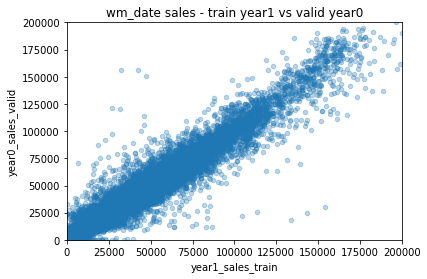

In [27]:
xy.plot.scatter("year1_sales_train", "year0_sales_valid", title="wm_date sales - train year1 vs valid year0", 
               ylim=(0, 200000), xlim=(0, 200000), alpha=0.3)

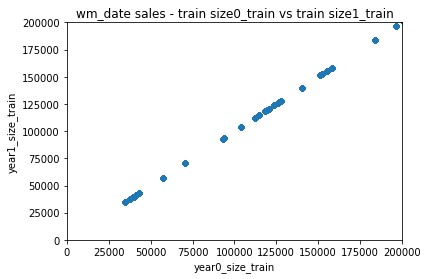

In [28]:
xy.plot.scatter("year0_size_train", "year1_size_train", title="wm_date sales - train size0_train vs train size1_train", 
               ylim=(0, 200000), xlim=(0, 200000), alpha=0.3)

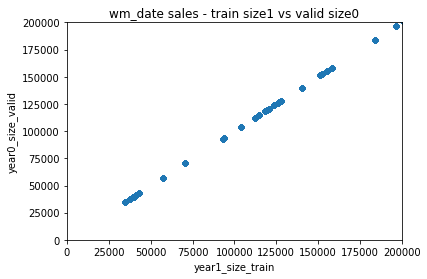

In [29]:
xy.plot.scatter("year1_size_train", "year0_size_valid", title="wm_date sales - train size1 vs valid size0", 
               ylim=(0, 200000), xlim=(0, 200000), alpha=0.3)

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression

NaN values

In [31]:
stats.freq(xy["year0_sales_train"].isna())

,freq_absolute,freq_relative
False,104610,90.50%
True,10978,9.50%


In [32]:
not_na_xy = xy[(xy["year0_sales_train"].notna()) & (xy["year1_sales_train"].notna())]

In [33]:
x = not_na_xy[["year0_sales_train", "year0_size_train"] + key_colnames + ["IsHoliday_train"]]
x.head(4)

,year0_sales_train,year0_size_train,Store,Dept,Date,IsHoliday_train
0,40212.84,126512.00,10,1,2012-02-03,False
1,67699.32,126512.00,10,1,2012-02-10,True
2,49748.33,126512.00,10,1,2012-02-17,False
3,33601.22,126512.00,10,1,2012-02-24,False


In [34]:
y = not_na_xy[["year1_sales_train"]]
y.head(4)

,year1_sales_train
0,36145.83
1,52118.42
2,64020.62
3,27273.94


In [35]:
# display(stats.freq(x["year0_sales_train"].isna()))
# display(stats.freq(x["year0_size_train"].isna()))
# display(stats.freq(y["year1_sales_train"].isna()))

#### Fitting

The X data used to fit are the <b>first</b> year Weekly_Sales and <b>first</b> year Size from trainning dataset. <br>
The Y data used to fit is the <b>second</b> year Weekly_Sales.

In [36]:
reg = LinearRegression().fit(x[["year0_sales_train", "year0_size_train"]], y)
reg.score(x[["year0_sales_train", "year0_size_train"]], y)

0.9630248044343439

In [37]:
reg.coef_

array([[0.98628267, 0.00301177]])

In [38]:
reg.intercept_

array([-283.41081387])

#### Applying

The X data used to fit are the <b>second</b> year Weekly_Sales and <b>second</b> year Size from trainning dataset. <br>
The Y data to be predicted is the <b>third</b> year Weekly_Sales from trainning dataset (represented by the <b>first</b> year from validation dataset).

In [39]:
x_valid = not_na_xy[["year1_sales_train", "year1_size_train", "year0_sales_valid", "year0_size_valid"] + key_colnames + ["IsHoliday_valid"]]
x_valid.head(4)

,year1_sales_train,year1_size_train,year0_sales_valid,year0_size_valid,Store,Dept,Date,IsHoliday_valid
0,36145.83,126512.00,36444.00,126512,10,1,2012-02-03,False
1,52118.42,126512.00,50434.11,126512,10,1,2012-02-10,True
2,64020.62,126512.00,74930.33,126512,10,1,2012-02-17,False
3,27273.94,126512.00,28751.57,126512,10,1,2012-02-24,False


In [40]:
y_pred = reg.predict(x_valid[["year1_sales_train", "year1_size_train"]])
y_pred

array([[35747.62047351],
       [51501.10921637],
       [63240.04283423],
       ...,
       [ 4155.76011193],
       [ 4219.76985734],
       [ 3355.10570168]])

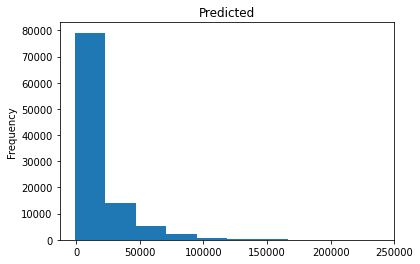

In [41]:
pd.DataFrame(y_pred)[0].plot.hist(title="Predicted")

In [42]:
pd.DataFrame(y_pred)[0].describe()

count   101790.00
mean     16171.29
std      21793.65
min       -965.43
25%       2614.32
50%       8123.53
75%      20513.17
max     238134.13
Name: 0, dtype: float64

In [43]:
y_valid = not_na_xy[["year0_sales_valid"]]
y_valid.head(4)

,year0_sales_valid
0,36444.00
1,50434.11
2,74930.33
3,28751.57


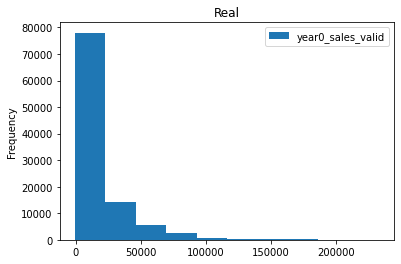

In [44]:
y_valid.plot.hist(title="Real")

In [45]:
reg.score(x_valid[["year1_sales_train", "year1_size_train"]], y_valid)

0.964862488840135

#### Evaluation

In [46]:
# store_colname="Store"
# dept_colname="Dept"
# date_colname="Date"

# display(x_valid[[store_colname, dept_colname, date_colname]])

# submission_df = pd.DataFrame()
# submission_df["Id"] = x_valid[store_colname].astype(str) + "_" + x_valid[dept_colname].astype(str) + "_" + x_valid[date_colname].astype(str)

# submission_df["Id"]

In [47]:
subm = evaluation.build_submission_df(test_df=x_valid, 
                                      target_predicted=y_pred)

In [48]:
subm.sample(5)

,Weekly_Sales
Id,
3_4_2012-09-28,7694.88
29_3_2012-08-17,18013.68
19_41_2012-04-20,2241.33
40_94_2012-04-06,38411.48
37_93_2012-03-02,21849.86


In [49]:
x_valid = x_valid.rename({"IsHoliday_valid": "IsHoliday", "year0_sales_valid": "Weekly_Sales"}, axis=1)
x_valid

,year1_sales_train,year1_size_train,Weekly_Sales,year0_size_valid,Store,Dept,Date,IsHoliday
0,36145.83,126512.00,36444.00,126512,10,1,2012-02-03,False
1,52118.42,126512.00,50434.11,126512,10,1,2012-02-10,True
2,64020.62,126512.00,74930.33,126512,10,1,2012-02-17,False
3,27273.94,126512.00,28751.57,126512,10,1,2012-02-24,False
4,30345.61,126512.00,30525.88,126512,10,1,2012-03-02,False
...,...,...,...,...,...,...,...,...
104605,3145.13,125833.00,3763.21,125833,9,96,2012-09-28,False
104606,4454.78,125833.00,4306.43,125833,9,96,2012-10-05,False
104607,4116.66,125833.00,3675.99,125833,9,96,2012-10-12,False
104608,4181.56,125833.00,3540.05,125833,9,96,2012-10-19,False


In [50]:
evaluation.evaluate(subm, x_valid)

2050.917579771999

#### Test

In [51]:
test.head()

,Store,Dept,Date,IsHoliday,timestamp,store_dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,datetime,day_n,month_n,year,date_ym,week_n,celsius,wm_date,celsius_diff,pre_holiday,pos_holiday,Type,Size
0,1,1,2012-11-02,False,1351825200.00,1_1,55.32,3.39,6766.44,5147.70,50.82,3639.90,2737.42,223.46,6.57,2012-11-02,2,11,2012,2012-11,1,12.96,11/1,-7.69,False,False,A,151315
1,19,10,2012-11-02,False,1351825200.00,19_10,46.81,3.97,11686.96,18053.48,88.94,5484.50,3833.76,138.62,7.99,2012-11-02,2,11,2012,2012-11,1,8.23,11/1,-5.38,False,False,A,203819
2,16,55,2012-11-02,False,1351825200.00,16_55,38.20,3.60,2826.02,984.41,4.46,274.18,1411.99,199.29,5.85,2012-11-02,2,11,2012,2012-11,1,3.44,11/1,-1.55,False,False,B,57197
3,22,18,2012-11-02,False,1351825200.00,22_18,54.55,3.82,8793.36,10347.53,5.62,7350.89,801.32,142.66,7.54,2012-11-02,2,11,2012,2012-11,1,12.53,11/1,-1.68,False,False,B,119557
4,25,16,2012-11-02,False,1351825200.00,25_16,40.83,3.79,12435.08,16493.02,55.19,1165.36,1144.39,216.16,7.29,2012-11-02,2,11,2012,2012-11,1,4.91,11/1,-8.81,False,False,B,128107


In [52]:
test["Date"].head(1).append(test["Date"].tail(1))

0         2012-11-02
115063    2013-07-26
Name: Date, dtype: object

In [53]:
try:
    dummy_test = pd.read_csv("data/ml_datasets/dummy_test_3.csv", sep=";")
except FileNotFoundError:
    test["Weekly_Sales"] = len(test) * [0]
    dummy_test = dummy_baseline_data(test)
    del test["Weekly_Sales"]
    dummy_test.to_csv("data/ml_datasets/dummy_test_3.csv", sep=";", index=False)

In [54]:
print("Total groups: ", len(dummy_test.drop_duplicates(["wm_date", "store_dept"])))
print(len(dummy_test))
dummy_test = dummy_test.rename({"year0_sales": "year0_sales_valid", 
                                "year0": "year0_valid",
                                "year0_size": "year0_size_valid",
                                "Store": "Store_test",
                                "Dept": "Dept_test",
                                "Date": "Date_test"}, axis=1)
dummy_test.head()

Total groups:  115064
115064


,store_dept,wm_date,Store_test,Dept_test,Date_test,IsHoliday,year0_valid,year0_sales_valid,year0_size_valid
0,10_1,01/1,10,1,2013-01-04,False,2013,0,126512
1,10_1,01/2,10,1,2013-01-11,False,2013,0,126512
2,10_1,01/3,10,1,2013-01-18,False,2013,0,126512
3,10_1,01/4,10,1,2013-01-25,False,2013,0,126512
4,10_1,02/1,10,1,2013-02-01,False,2013,0,126512


In [78]:
try:
    dummy_train_valid = pd.read_csv("data/ml_datasets/dummy_train_valid_3.csv", sep=";")
except FileNotFoundError:
    dummy_train_valid = dummy_baseline_data(use_train.append(use_valid))
    dummy_train_valid.to_csv("data/ml_datasets/dummy_train_valid_3.csv", sep=";", index=False)

In [79]:
print("Total groups: ", len(dummy_train_valid.drop_duplicates(["wm_date", "store_dept"])))
print(len(dummy_train_valid))
dummy_train_valid = dummy_train_valid.rename({"year0_sales": "year0_sales_train", 
                                              "year0": "year0_train",
                                              "year0_size": "year0_size_train",
                                              "year1_sales": "year1_sales_train", 
                                              "year1": "year1_train",
                                              "year1_size": "year1_size_train",
                                              "year2_sales": "year2_sales_train", 
                                              "year2": "year2_train",
                                              "year2_size": "year2_size_train",
                                              "Store": "Store_train",
                                              "Dept": "Dept_train",
                                              "Date": "Date_train"}, axis=1)
dummy_train_valid.head()

Total groups:  170730
170730


,store_dept,wm_date,Store_train,Dept_train,Date_train,IsHoliday,year0_train,year0_sales_train,year0_size_train,year1_train,year1_sales_train,year1_size_train,year2_train,year2_sales_train,year2_size_train
0,10_1,01/1,10,1,2011-01-07,False,2011,26041.71,126512,2012.00,28520.49,126512.00,nan,nan,nan
1,10_1,01/2,10,1,2011-01-14,False,2011,27859.44,126512,2012.00,30107.31,126512.00,nan,nan,nan
2,10_1,01/3,10,1,2011-01-21,False,2011,30911.87,126512,2012.00,31180.23,126512.00,nan,nan,nan
3,10_1,01/4,10,1,2011-01-28,False,2011,29890.73,126512,2012.00,32559.13,126512.00,nan,nan,nan
4,10_1,02/1,10,1,2010-02-05,False,2010,40212.84,126512,2011.00,36145.83,126512.00,2012.00,36444.00,126512.00


In [80]:
xy_test = pd.merge(dummy_train_valid, dummy_test, 
                   left_on=["wm_date", "store_dept"], right_on=["wm_date", "store_dept"], 
                   how="right", suffixes=["_train", "_test"])

print("Total groups: ", len(xy_test.drop_duplicates(["wm_date", "store_dept"])))
print(len(xy_test))
xy_test.sample(6)

Total groups:  115064
115064


,store_dept,wm_date,Store_train,Dept_train,Date_train,IsHoliday_train,year0_train,year0_sales_train,year0_size_train,year1_train,year1_sales_train,year1_size_train,year2_train,year2_sales_train,year2_size_train,Store_test,Dept_test,Date_test,IsHoliday_test,year0_valid,year0_sales_valid,year0_size_valid
19728,17_71,03/5,17.00,71.00,2012-03-30,False,2012.00,2629.02,93188.00,nan,nan,nan,nan,nan,nan,17,71,2013-03-29,False,2013,0,93188
112777,38_32,12/3,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,38,32,2012-12-21,False,2012,0,39690
59628,31_55,03/1,31.00,55.00,2010-03-05,False,2010.00,7281.77,203750.00,2011.00,9000.42,203750.00,2012.00,7631.41,203750.00,31,55,2013-03-01,False,2013,0,203750
30589,20_91,12/3,20.00,91.00,2010-12-17,False,2010.00,79463.27,203742.00,2011.00,82439.55,203742.00,nan,nan,nan,20,91,2012-12-21,False,2012,0,203742
22978,18_98,05/1,18.00,98.00,2010-05-07,False,2010.00,270.37,120653.00,2011.00,-2.48,120653.00,2012.00,1778.79,120653.00,18,98,2013-05-03,False,2013,0,120653
7488,12_91,06/2,12.00,91.00,2010-06-11,False,2010.00,8835.24,112238.00,2011.00,7834.91,112238.00,2012.00,8900.50,112238.00,12,91,2013-06-14,False,2013,0,112238


#### Filling NaN values

In [81]:
stats.freq(xy_test["year1_sales_train"].isna())

,freq_absolute,freq_relative
False,103036,89.55%
True,12028,10.45%


In [82]:
stats.freq(xy_test["year0_sales_train"].isna())

,freq_absolute,freq_relative
False,107964,93.83%
True,7100,6.17%


In [83]:
stats.freq(xy_test["year2_sales_train"].isna())

,freq_absolute,freq_relative
False,67182,58.39%
True,47882,41.61%


In [84]:
stats.freq((xy_test["year0_sales_train"].isna()) & 
           (xy_test["year1_sales_train"].isna()) & 
           (xy_test["year2_sales_train"].isna()))

,freq_absolute,freq_relative
False,107964,93.83%
True,7100,6.17%


In [85]:
not_na_xy_test = xy_test[xy_test["year1_sales_train"].notna()]

In [86]:
na_xy_test = xy_test[xy_test["year1_sales_train"].isna()]

In [89]:
stats.freq(na_xy_test["store_dept"].isin(dummy_train_valid["store_dept"]))

,freq_absolute,freq_relative
True,11992,99.70%
False,36,0.30%


In [98]:
stats.freq(na_xy_test["Store_test"].isin(not_na_xy_test["Store_train"]))

,freq_absolute,freq_relative
True,12028,100.00%


In [99]:
stats.freq(na_xy_test["Dept_test"].isin(not_na_xy_test["Dept_train"]))

,freq_absolute,freq_relative
True,11971,99.53%
False,57,0.47%


filling

In [102]:
def dummy_fill_dept_median(row, refference_data, fill_colnames):
    dept_data = refference_data[refference_data["Dept_train"] == row["Dept_test"]]
    for fill_colname in fill_colnames:
        row[fill_colname] = dept_data[fill_colname].median()
    return row

def dummy_fill_store_median(row, refference_data, fill_colnames):
    dept_data = refference_data[refference_data["Store_train"] == row["Store_test"]]
    for fill_colname in fill_colnames:
        row[fill_colname] = dept_data[fill_colname].median()
    return row

In [101]:
na_xy_test_filled = na_xy_test.apply(lambda row : dummy_fill_dept_median(row, dummy_train_valid, ["year1_sales_train", "year1_size_train"]), axis=1)

In [ ]:
stats.freq(na_xy_test_filled["year1_sales_train"].isna())

In [103]:
na_xy_test_filled = na_xy_test_filled.apply(lambda row : dummy_fill_store_median(row, dummy_train_valid, ["year1_sales_train", "year1_size_train"]), axis=1)

In [104]:
stats.freq(na_xy_test_filled["year1_sales_train"].isna())

,freq_absolute,freq_relative
False,12028,100.00%


#### Predicting

In [ ]:
# not_na_xy_test = xy_test[xy_test["year1_sales_train"].notna()]

In [105]:
x_test = not_na_xy_test.append(na_xy_test_filled)#[["year1_sales_train", "year1_size_train"] + key_colnames + ["IsHoliday_test"]]
x_test.head(4)

,store_dept,wm_date,Store_train,Dept_train,Date_train,IsHoliday_train,year0_train,year0_sales_train,year0_size_train,year1_train,year1_sales_train,year1_size_train,year2_train,year2_sales_train,year2_size_train,Store_test,Dept_test,Date_test,IsHoliday_test,year0_valid,year0_sales_valid,year0_size_valid
0,10_1,01/1,10.00,1.00,2011-01-07,False,2011.00,26041.71,126512.00,2012.00,28520.49,126512.00,nan,nan,nan,10,1,2013-01-04,False,2013,0,126512
1,10_1,01/2,10.00,1.00,2011-01-14,False,2011.00,27859.44,126512.00,2012.00,30107.31,126512.00,nan,nan,nan,10,1,2013-01-11,False,2013,0,126512
2,10_1,01/3,10.00,1.00,2011-01-21,False,2011.00,30911.87,126512.00,2012.00,31180.23,126512.00,nan,nan,nan,10,1,2013-01-18,False,2013,0,126512
3,10_1,01/4,10.00,1.00,2011-01-28,False,2011.00,29890.73,126512.00,2012.00,32559.13,126512.00,nan,nan,nan,10,1,2013-01-25,False,2013,0,126512


In [107]:
y_test_pred = reg.predict(x_test[["year1_sales_train", "year1_size_train"]])
y_test_pred

array([[28226.87976393],
       [29791.9328334 ],
       [30850.13523777],
       ...,
       [ 4396.36376975],
       [ 4396.36376975],
       [ 4396.36376975]])

In [109]:
subm = evaluation.build_submission_df(test_df=x_test, 
                                      target_predicted=y_test_pred,
                                      store_colname="Store_test", 
                                      dept_colname="Dept_test", 
                                      date_colname="Date_test")

In [123]:
subm["Weekly_Sales"] = subm["Weekly_Sales"].apply(lambda ws : round(ws, 2))

In [124]:
subm.reset_index()

,Id,Weekly_Sales
0,10_1_2013-01-04,28226.88
1,10_1_2013-01-11,29791.93
2,10_1_2013-01-18,30850.14
3,10_1_2013-01-25,32210.12
4,10_1_2013-02-01,35747.62
...,...,...
115059,9_96_2012-11-30,4396.36
115060,9_99_2013-07-05,4396.36
115061,9_99_2013-07-19,4396.36
115062,9_99_2013-07-26,4396.36


In [116]:
subm.reset_index().to_csv("data/submissions/subm1.csv", index=False)

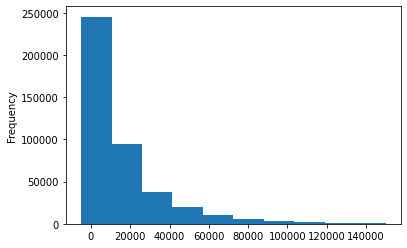

In [132]:
train[train["Weekly_Sales"] < 150000]["Weekly_Sales"].plot.hist()

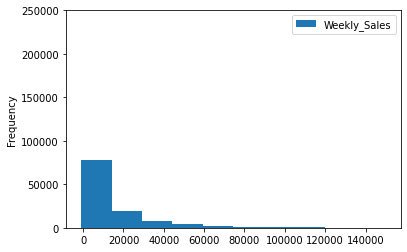

In [134]:
subm[subm["Weekly_Sales"] < 150000].plot.hist(ylim=(0,250000))